In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Run through the notebook to output a visualization of the relative Fragments per Kilobase Million (FPKM) counts for 1000 out of the 50,281 total genes from the Allen Brain Atlas' Aging, Dementia and TBI study.

## Open, z-score, and clean the FPKM data

In [3]:
#open
data = pd.read_csv('fpkm_table_normalized.csv') 

#remove headers
data = data.iloc[1:,1:]

#z-score
mean = data.mean(axis=1)
stdev = data.std(axis=1)
data = data.subtract(mean, axis = 0)
data = data.divide (stdev, axis = 0)
data = data.transpose()

#remove empty rows and columns
data = data.dropna(axis = 1)
data = data.dropna(axis = 0)

## Plot a subset of the data

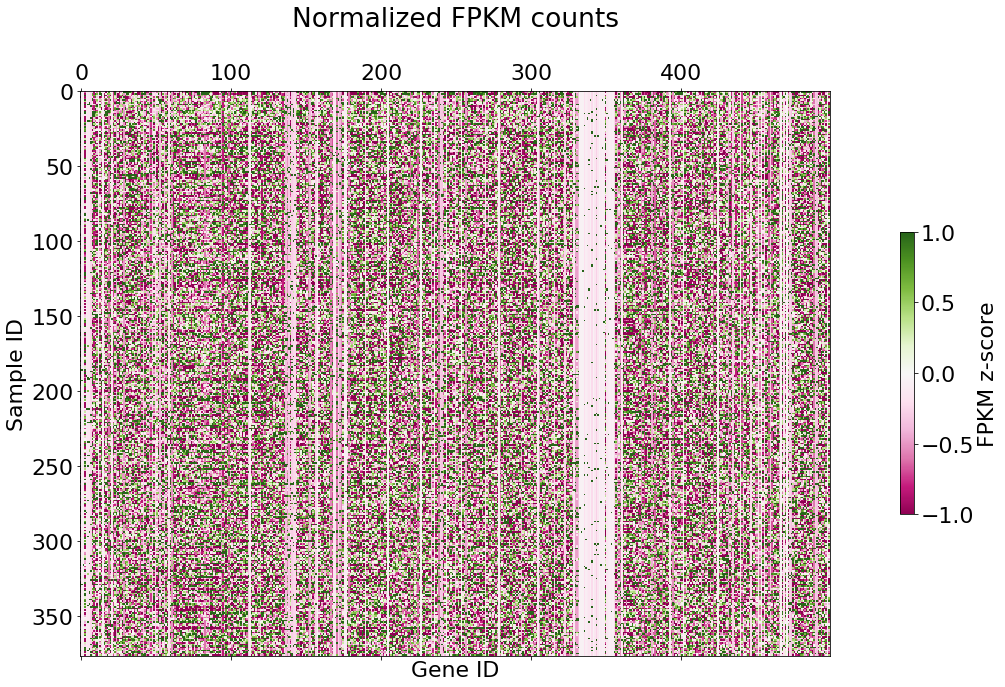

In [4]:
subset_size = 500 #size of subset to be visualized

#plot data
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (20,10))
im = ax.matshow(data.iloc[:, :subset_size], cmap = 'PiYG', vmin = -1, vmax = 1 )
ax.set_xlabel('Gene ID')
ax.set_ylabel('Sample ID')
ax.set_title('Normalized FPKM counts\n')
cbar = fig.colorbar(im, shrink=.5)
cbar.set_label('FPKM z-score')
fig.tight_layout()
fig.savefig('datavisualization.png', bbox='tight')
plt.show()